In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import gym
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt


# Fonction pour afficher l'image dans le notebook
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title(f"Step: {step} {info}")
    plt.axis('off')
    
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

def test(model, env):
    # Test de l'agent entraîné
    observation = env.reset()
    done = False
    step = 0
    while not done:
        action, _ = model.predict(observation, deterministic=True)
        observation, reward, done, info = env.step(action)
        show_state(env, step)
        step += 1
    
    ipythondisplay.clear_output(wait=True)
    env.close()
# Création de l'environnement
env = make_vec_env('CartPole-v1', n_envs=1)
# Initialisation de l'agent
model = PPO('MlpPolicy', env, verbose=1, device="cuda")


ModuleNotFoundError: No module named 'stable_baselines3'

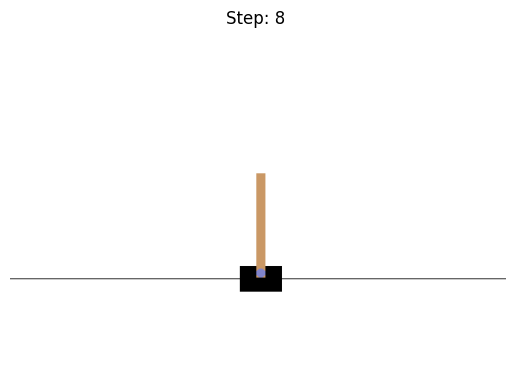

In [5]:
test(model, env)

In [7]:

# Entraînement de l'agent
model.learn(total_timesteps=10000)

# Sauvegarde du modèle
model.save("ppo_cartpole")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | 24.4     |
| time/              |          |
|    fps             | 2266     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.5        |
|    ep_rew_mean          | 27.5        |
| time/                   |             |
|    fps                  | 1391        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008858597 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.012      |
|    learning_rate        | 0.

KeyboardInterrupt: 

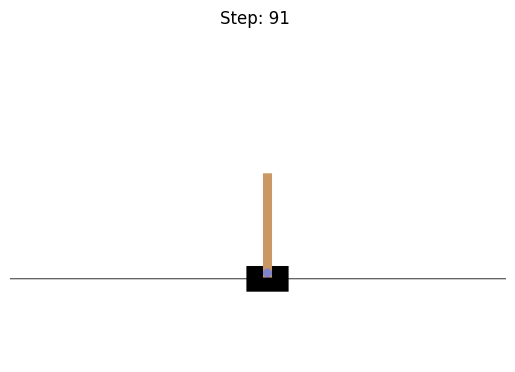

In [8]:
test(model, env)